In [15]:
import pickle
with open('/home/oldrain123/results/d_results_2.data', 'rb') as f:
    pkl_data = pickle.load(f)

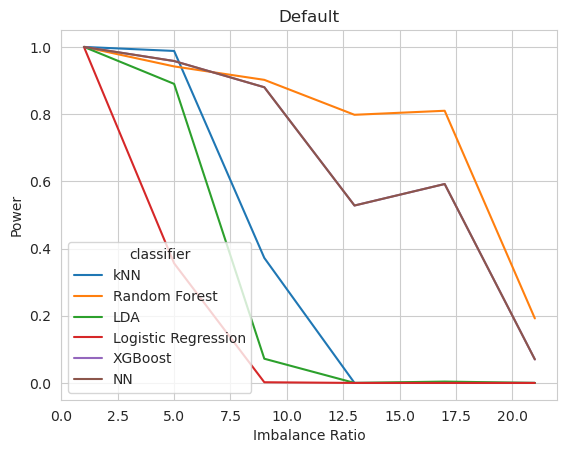

In [17]:
import sys
sys.path.append('/home/oldrain123/imbalanced_c2st/')

from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from model import NeuralNet
import numpy as np 
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ir_list = [1, 5, 9, 13, 17, 21]
classifiers= {
            'kNN': KNeighborsClassifier(),
            'Random Forest': RandomForestClassifier(n_estimators=100),
            'LDA': LinearDiscriminantAnalysis(),
            'Logistic Regression': LogisticRegression(),
            'XGBoost': XGBClassifier(),
            'NN': NeuralNet(x_in=1, H=50, x_out=2, device='cuda:0', dtype=torch.float)
            }
data_p =[]
for r in ir_list:
    for name, clf in classifiers.items():
        pwr = np.mean(pkl_data[r][name] >= (1-norm.ppf(0.05)))
        data_p.append({'imbalance_ratio': r, 'classifier': name, 'power': pwr})
        
df_p = pd.DataFrame(data_p)
# Create the plot
sns.set_style("whitegrid")
sns.lineplot(data=df_p, x="imbalance_ratio", y="power", hue="classifier")

# Add axis labels and a title
plt.xlabel("Imbalance Ratio")
plt.ylabel("Power")
plt.title("Default")

# Show the plot
plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sys
sys.path.append('/home/oldrain123/imbalanced_c2st/')

import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.stats import norm

from model import c2st_nn_fit
from utils import GenerateData, MatConvert